# Crash Course on Surviving the Math (and Python)
Week One - July 25, 2022

Note, the author has all of the code available on [Github](https://github.com/joelgrus/data-science-from-scratch)

## Chapter 2 - First, a Minimal Intro to Python
For a deeper dive read Chapter 2 and as a quick reference, see [the Python 3 Cheat Sheet](https://www.pythoncheatsheet.org/cheatsheet/basics).

Note that a lot of the code here is *not* following best practices for coding consistancy and organization, but rather is attempting to show a variety of methods to accomplish similar results. If your team has a coding standard, follow it please (seriously, it is important for sane software engineering!)

### Setting up the Environment

If you are on your own system (instead of this ephemerial notebook) instead of the below 'conda' commands, run the following on your system command prompt (you only have to do it once for your own system, not every time):

<code>pip install numpy, matplotlib, tqdm, scikit-learn</code>

If would like the Jupyter environment on your own system, you can install Jupyter Notebooks via:

<code> pip install jupyter </code>

Then you can either work in VS Code, Notepad, or you can launch a localhost Jupyter notebook with the command:

<code>jupyter notebook</code>

In [1]:
# This is how you import additional functionality via libraries:
import math
import sys
# This is how you install new packages in Jupyter Notebooks (when you don't have system access)
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} tqdm
!conda install --yes --prefix {sys.prefix} scikit-learn

# .. and then include them
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found


### Using the Environment

In [2]:
# This is a Python Comment which starts with a '#' sign
# Below is Python Code

# This is how you declare and assign a scalar variable. Variables contain values that can also change.
myValue = 234.234

# This is how you declare and assign an array variable of multiple values (Numpy will use proper 'vectors')
myVector = [1, 1, 2, 3, 5, 8, 13]

# This is how you print out the value of a variable
print("My scalar value is %s" % myValue)
print("My vector has the list of values: %s" % myVector)
print("My vector's first element (zero-th index): %s" % myVector[0])

# You can do math:
print("The product of Value and 2 = %s" % (myValue * 2))
print("Value divided by 2 = %s" % (myValue / 2))
print("Square root of Value = %s" % (math.sqrt(myValue)))
print("Square root of Value = %s" % (myValue ** 0.5))

# You can manipulate the array:
myVector.reverse()
print("Reversed vector has the list of values: %s" % myVector)
print("Reversed vector's first element (zero-th index): %s" % myVector[0])

# This is how you define a function... btw, this particular function will be important for perceptrons and other normalization of values to (0.0, 1.0) 
def sigmoidal(x):
    return (1.0 / (1.0 + np.e ** (0-x)))


My scalar value is 234.234
My vector has the list of values: [1, 1, 2, 3, 5, 8, 13]
My vector's first element (zero-th index): 1
The product of Value and 2 = 468.468
Value divided by 2 = 117.117
Square root of Value = 15.304705158871895
Square root of Value = 15.304705158871895
Reversed vector has the list of values: [13, 8, 5, 3, 2, 1, 1]
Reversed vector's first element (zero-th index): 13


## Chapter 3 - Visualizations



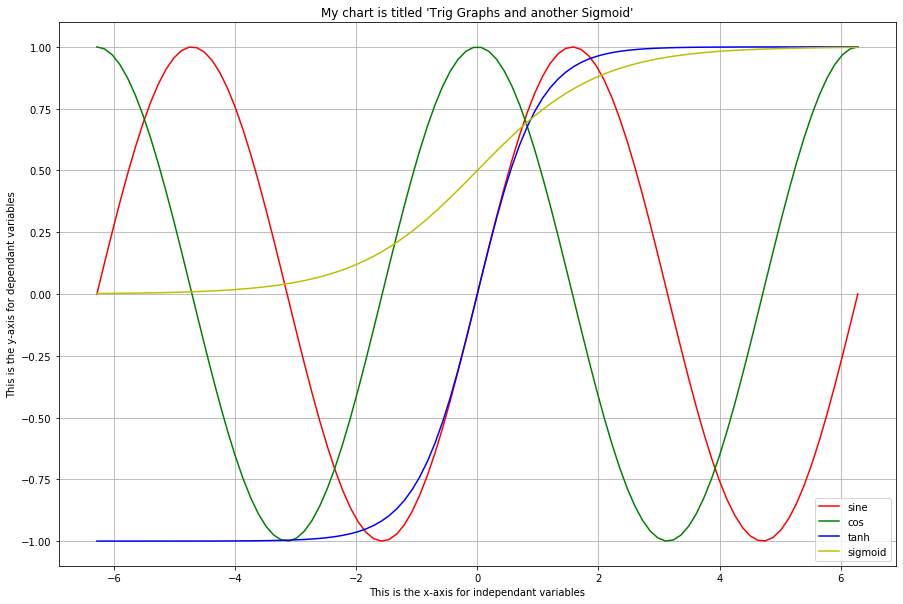

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tanh(x)  # <--- Remember this "Sigmoidal" function for later (Sigmoid from Sigma from the greek letter, which in English starts with an 'S' and this curve is 'S' shaped)
y4 = [sigmoidal(i) for i in x] # <--- This is the other Sigmoid function - remember it too

fig, ax = plt.subplots()
ax.plot(x, y1, color='r', label='sine')
ax.plot(x, y2, color='g', label='cos')
ax.plot(x, y3, color='b', label='tanh')
ax.plot(x, y4, color='y', label='sigmoid')
plt.gcf().set_size_inches(15,10)
plt.xlabel("This is the x-axis for independant variables")
plt.ylabel("This is the y-axis for dependant variables")
plt.title("My chart is titled 'Trig Graphs and another Sigmoid'")
plt.grid(True, which='both')
plt.legend()
plt.show()



## Chapter 4 - Linear Algebra
### The Second Most Important Equation in Machine Learning
There are [may different 'distance' approaches](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa), but the most common is one we are familiar with by other names and simpler forms:


![Euclidian Distance](https://miro.medium.com/max/844/0*wv6oFAVd0_PQ50mX)


In code:

In [4]:
def euclidianDistance(a, b):
    result = 0
    if len(a) == len(b):
        summation = 0
        for i in range(len(a)):
            summation = (a[i] - b[i]) ** 2
        result = summation ** 0.5
    else:
        print("WARNING: array sizes must be the same!")
    return result

The magnitude of the vector is effectively the distance from an 'origin' (all zero values) vector.  The L<sub>2</sub>-Norm, sometimes noted |X|<sub>2</sub>, is the Euclidian magnitude or Euclidian distance to the origin. Likewise the L<sub>1</sub>-Norm, sometimes noted |X|<sub>1</sub>, is the Manhattan distance to the origin.

L<sub>2</sub>-Norm = ![L2-Norm](https://wikimedia.org/api/rest_v1/media/math/render/svg/50aa64b52c9ebd19d47552eae57ec4a05cf43e67)         and likewise the L<sub>p</sub>-Norm =  ![LP-Norm](https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5615d02f7a03013e22bd4adf055cdbe4a303c)

Related is the Root-mean-squared (RMS) Error, which adds a normalizing term dividing the summation by the vector size before taking the square root. 


![RMSE](https://www.gstatic.com/education/formulas2/443397389/en/root_mean_square.svg)

In code:

In [5]:
def rmse(hypothesis, truth):
    result = 0
    if len(hypothesis) == len(truth):
        summation = 0
        for i in range(len(hypothesis)):
            summation = (hypothesis[i] - truth[i]) ** 2
        result = (summation/len(hypothesis)) ** 0.5        # <--- differs from Euclidian Distance here
    else:
        print("WARNING: array sizes must be the same!")
    return result


... but in the end, these are all forms of the [Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance): 

![Minkowski Distance](https://miro.medium.com/max/902/0*UbbyH2MUPb5ZBa64)

In code form:

In [6]:
def minkowski(a, b, p):
    result = 0
    if len(a) == len(b):
        summation = 0
        maxDiff = 0
        for i in range(len(a)):
            if p < 500:
                summation += abs(a[i] - b[i]) ** p
            maxDiff = max(maxDiff, abs(a[i] - b[i]))
        if p > 500:
            result = maxDiff
        else:
            result = summation ** (1.0/p)
    else:
        print("WARNING: array sizes must be the same!")
    return result


The value of 'p' transforms the equation from Manhattan distance (p=0, a.k.a. L<sub>1</sub>-Norm) to Euclidian distance (p=1, a.k.a. L<sub>2</sub>-Norm), or [Chebyshev distance](https://en.wikipedia.org/wiki/Chebyshev_distance) as p approaches infinity (which is effectively the max distance of any present index). For fractional values of 'p' where 0 < p < 1, the 'Agrawal' distance is extremely useful to mitigate the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). 

![Variations of P](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/2D_unit_balls.svg/967px-2D_unit_balls.svg.png)

... and because I can't miss an XKCD opportunity:

![XKCD2426](https://imgs.xkcd.com/comics/minkowski_space.png)
<center>XKCD 2646 We were able to follow the ship into Minkowski space, but now they've jumped to Hilbert space and they could honestly be anywhere.</center>

### In Python

In [7]:
import random

N = 4
vec0 = [ 0 for x in range(N)]
vec1 = [random.gauss(5, 2) for x in range(N)] 
vec2 = [random.gauss(10, 2) for x in range(N)] 
vec1.sort()
vec2.sort()

print("Vector 0: %s" % vec0)
print("Vector 1: %s" % vec1)
print("Vector 2: %s" % vec2)

print("L1-Norm of Vector 1:{:>13,.2f}".format(minkowski(vec1, vec0, 1)))
print("L1-Norm of Vector 2:{:>13,.2f}".format(minkowski(vec2, vec0, 1)))
print("L2-Norm of Vector 1:{:>13,.2f}".format(minkowski(vec1, vec0, 2)))
print("L2-Norm of Vector 2:{:>13,.2f}".format(minkowski(vec2, vec0, 2)))

print("Agrawal   Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    0.1)))
print("Manhattan Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    1)))
print("Euclidian Distance: {:>13,.2f}".format(minkowski(vec1, vec2,    2)))
print("Chebyshev Distance: {:>13,.2f}".format(minkowski(vec1, vec2, 3000)))

Vector 0: [0, 0, 0, 0]
Vector 1: [2.251255539043644, 4.872328010778603, 6.265244658666926, 8.017975743606138]
Vector 2: [8.678385697979579, 10.027053264995146, 10.898286456481195, 11.359124554777914]
L1-Norm of Vector 1:        21.41
L1-Norm of Vector 2:        40.96
L2-Norm of Vector 1:        11.50
L2-Norm of Vector 2:        20.58
Agrawal   Distance:  5,003,811.85
Manhattan Distance:         19.56
Euclidian Distance:         10.03
Chebyshev Distance:          6.43


### Matrix

A Matrix is essentially an array of arrays. Stack them further and it is called a tensor (hence TensorFlow).


In [8]:

m = [[1, 2, 3],[4, 5, 6]]

print("Matrix m = %s" % m)
print("Element 1,2 is %s" % m[1][2])


Matrix m = [[1, 2, 3], [4, 5, 6]]
Element 1,2 is 6


## Chapter 5 - Statistics





In [9]:
from typing import List

# The first statistical moment
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

# normalize the set to mean = 0
def de_mean(xs: List[float]) -> float:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

# The second statistical moment
# Variance is the average distance to the average
def variance(xs: List[float]) -> float:
    dm = de_means(xs)
    return np.dot(dm,dm) / (len(xs) - 1)


def covariance(xs: List[float], ys: List[float]) -> float:
    return np.dot(de_means(xs), de_means(ys)) / (len(xs) - 1)

def corr(xs: List[float], ys: List[float]) -> float:
    stddev_x = variance(xs) ** 0.5 # variance is 'sigma-squared', so square-root of variance = standard deviation
    stddev_y = variance(ys) ** 0.5
    if stddev_x > 0 and stddev_y > 0:
        return covariance(xs, ys) / stddev_x / stddev_y
    else:
        return 0



## Chapter 6 - Probability

### Probability Distributions


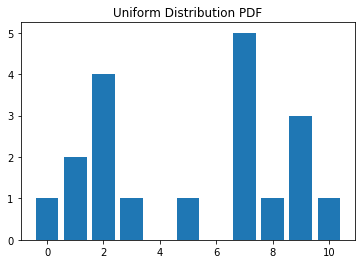

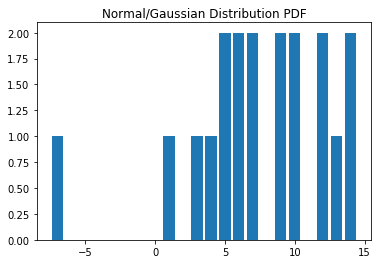

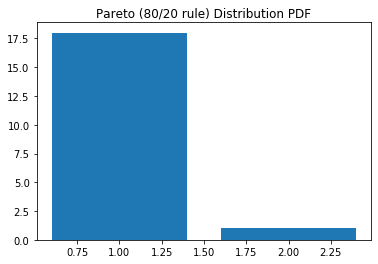

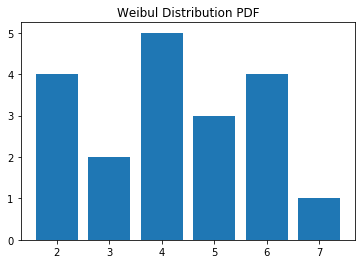

In [10]:
import random
from collections import Counter
#import matplotlib.pyplot as plt
#import numpy as np

# Uniform random between 0.0-1.0
randX = random.random()

# If N is low, the plots do not necessarily take shape. The number must be large enough to get "sufficient statistics"
N = 20
mean = 5
spread = 5

uniformSet  = []
gaussianSet = []
paretoSet   = []
weibullSet  = []

for i in range(1,N):
    uniformSet.append(round(random.uniform(mean-spread,mean+spread),3))
    gaussianSet.append(round(random.gauss(mean,spread),3))
    paretoSet.append(round(random.paretovariate(mean),3))
    weibullSet.append(round(random.weibullvariate(mean,spread),3))

uniformSet.sort()
gaussianSet.sort()
paretoSet.sort()
weibullSet.sort()

#print("Uniform set: %s" % uniformSet)
#print("Normal set:  %s" % gaussianSet)
#print("Pareto set:  %s" % paretoSet)
#print("Weibull set: %s" % weibullSet)

uniformHistogram = Counter(round(x,0) for x in uniformSet)
normalHistogram = Counter(round(x,0) for x in gaussianSet)
paretoHistogram = Counter(round(x,0) for x in paretoSet)
weibullHistogram = Counter(round(x,0) for x in weibullSet)

plt.bar([x for x in uniformHistogram.keys()], uniformHistogram.values())
plt.title("Uniform Distribution PDF")
plt.show()

plt.bar([x for x in normalHistogram.keys()], normalHistogram.values())
plt.title("Normal/Gaussian Distribution PDF")
plt.show()

plt.bar([x for x in paretoHistogram.keys()], paretoHistogram.values())
plt.title("Pareto (80/20 rule) Distribution PDF")
plt.show()

plt.bar([x for x in weibullHistogram.keys()], weibullHistogram.values())
plt.title("Weibul Distribution PDF")
plt.show()

### Discrete Probability Distributions



Corpus: ['aa', 'aa', 'aa', 'ab', 'ab', 'ab', 'ac', 'ac', 'ac', 'ad', 'ae', 'ae', 'ae', 'ae', 'af', 'ag', 'ba', 'bb', 'bb', 'bb', 'bb', 'bc', 'bd', 'bd', 'be', 'be', 'be', 'bf', 'bf', 'bf', 'bg', 'bg', 'bg', 'ca', 'cb', 'cb', 'cc', 'cc', 'cd', 'cd', 'cd', 'ce', 'ce', 'ce', 'ce', 'ce', 'cf', 'cg', 'cg', 'cg', 'cg', 'cg', 'da', 'da', 'da', 'db', 'db', 'db', 'db', 'dc', 'dd', 'de', 'de', 'df', 'df', 'dg', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ec', 'ec', 'ed', 'ee', 'ef', 'eg', 'fa', 'fa', 'fa', 'fa', 'fb', 'fb', 'fc', 'fc', 'fe', 'ff', 'ff', 'fg', 'gb', 'gc', 'gc', 'ge', 'ge', 'ge', 'gf', 'gg']

 Historgram Data: Counter({'ea': 7, 'ce': 5, 'cg': 5, 'ae': 4, 'bb': 4, 'db': 4, 'fa': 4, 'aa': 3, 'ab': 3, 'ac': 3, 'be': 3, 'bf': 3, 'bg': 3, 'cd': 3, 'da': 3, 'ge': 3, 'bd': 2, 'cb': 2, 'cc': 2, 'de': 2, 'df': 2, 'ec': 2, 'fb': 2, 'fc': 2, 'ff': 2, 'gc': 2, 'ad': 1, 'af': 1, 'ag': 1, 'ba': 1, 'bc': 1, 'ca': 1, 'cf': 1, 'dc': 1, 'dd': 1, 'dg': 1, 'ed': 1, 'ee': 1, 'ef': 1, 'eg': 1, 'fe': 1, 

Text(0.5, 1.0, '2-gram/digraph Distribution PMF')

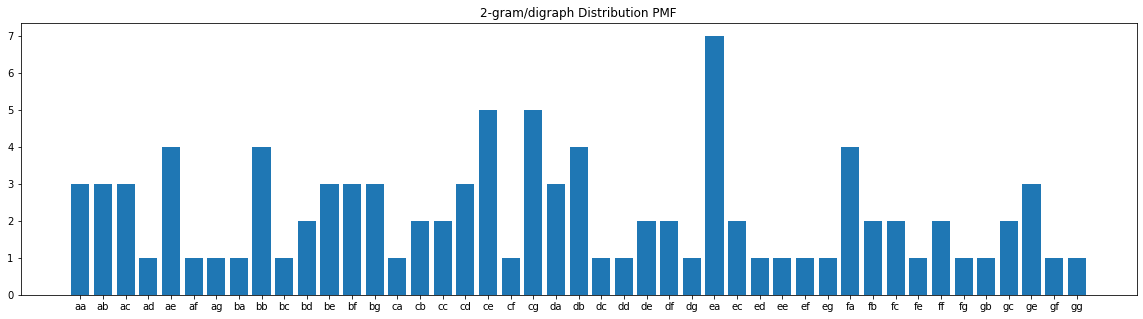

In [11]:
import random
from collections import Counter 

alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
corpus = []
for i in range(1,100):
    word = ""
    for j in range (1,3):
        word = word + alphabet[random.randint(0,6)]
    corpus.append(word)
corpus.sort()
print("Corpus: %s" % corpus)

corpusHistogram = Counter(x for x in corpus)
print("\n Historgram Data: %s" % corpusHistogram)
plt.bar([x for x in corpusHistogram.keys()], corpusHistogram.values())
plt.gcf().set_size_inches(20, 5)
plt.title("2-gram/digraph Distribution PMF")
#plt.show()




### Bayes Formula (or the Third Most Important Formula in Machine Learning)
Devised by Thomas Bayes in the 1700's, but now a critical for predictive modeling and analysis:

![Bayes Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/c1a7279a1639d92d751e0f2d3aa54e62a2ddb1e8)

The common formulation and use deals with seemingly likely outcomes weighted by other information:

![BayesUse](https://wikimedia.org/api/rest_v1/media/math/render/svg/b01f679001d8f19c6c6036f1ac66ca3c3f400258)

### The Monte Hall Problem
Imagine you are at a game show, with three doors. One has a good prize, two have a bad prize (goat?). You choose one:

![Monte Hall Step 1](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/220px-Monty_open_door.svg.png)

Then the host reveals one door with two assumptions:

1) The Host will NOT reveal the door you chose first
2) The Host will NOT reveal the prize

The host then asks if you want to keep your original door choice, or switch to the remaining door. This is your final choice and you will get the prize (or goat) behind your final decision. What choice should you make to maximize your probability of winning the prize?

![Monte Hall Step 2](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Monty_Hall_Problem_-_Standard_probabilities.svg/330px-Monty_Hall_Problem_-_Standard_probabilities.svg.png)

Let's prove the Monte Hall solution using Monte Carlo (no relation):

  0%|          | 0/100 [00:00<?, ?iter/s]

  0%|          | 0/100 [00:00<?, ?iter/s]

  0%|          | 0/100 [00:00<?, ?iter/s]

Results with 3 doors and 100 trials
Proportion of wins without switching: 38.00%
Proportion of wins with switching:    68.00%
Proportion of wins with random:       57.00%


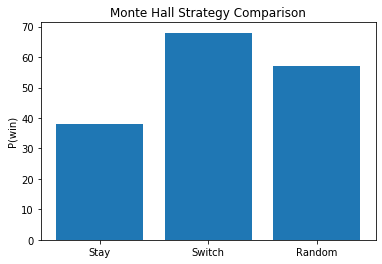

In [12]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import math, enum, random


# Let D = number of doors in the game
D=3
# Let us run these many trials (large number for sufficient statistics)
TRIALS=100
# These will be our two strategies
STAY_STRATEGY = 0
SWITCH_STRATEGY = 1

#
# We want to use a strategy pattern for the game, so lets make some strategy behavior classes...
#
# Based Monte Hall decider always stays
class BaseMonteHallDecider:
    def decide(self, x):
        return STAY_STRATEGY

class SavvyMonteHallDecider(BaseMonteHallDecider):
    # Override the based class and this time always switch
    def decide(self, x):
        return SWITCH_STRATEGY

class RandomMonteHallDecider(BaseMonteHallDecider):
    # Override the base class and randomly choose STAY_STRATEGY(0) or SWITCH_STRATEGY(1)
    def decide(self, x):
        return random.randint(0,1)

stayPlayer       = BaseMonteHallDecider()
switchPlayer     = SavvyMonteHallDecider()
indecisivePlayer = RandomMonteHallDecider()

# Define a single instance/execution of the game
# Param 1 = player strategy class
# Param 2 = Number of doors in the game
def monteHallGame(strategyBehavior, D):
    # Create D Doors
    doors = [0 for x in range(D)]
    choice = [0 for x in range(D)]
    
    # Place the Prize
    door_with_prize = random.randint(0, D-1)
    doors[door_with_prize] = 1
    
    # Choose first door
    door_I_choose  = random.randint(0, D-1)
    choice[door_I_choose] = 1
    second_choice_door = 0
    # Remove all but two doors keeping with the rules of the game
    if door_I_choose == door_with_prize:
        second_choice_door = (door_I_choose + random.randint(1, D-1)) % D # If my door has the prize, leave a random other door closed
        doors[second_choice_door] = 1
    else:
        second_choice_door = door_with_prize
        doors[door_I_choose] = 1
    
    final_choice_door = door_I_choose
   
    action = strategyBehavior.decide(choice + doors)   # <--- Here is where the magic happens
    if action >= 0.5: 
        # If switching, remove my door from choices my final choice is the remaining door
        final_choice_door = second_choice_door
    else:
        final_choice_door = door_I_choose
                
    # return True (1) if we chose the prize, plus the initial door choice and second round options (for learning later)
    return (door_with_prize == final_choice_door), choice, doors, action


# Manage multiple independant expirements of the game
def monteCarlo(strategyBehavior, D):
    winCount = 0
    for i in tqdm(range(TRIALS),unit="iter"):
        result, _, _, _ = monteHallGame(strategyBehavior, D) 
        winCount += result
    return winCount

stay_wins   = monteCarlo(stayPlayer, D)
switch_wins = monteCarlo(switchPlayer, D)
random_wins   = monteCarlo(indecisivePlayer, D)
print('Results with %s doors and %s trials' % (D,TRIALS))
print('Proportion of wins without switching: {:.2f}%'.format(100.0*stay_wins/TRIALS))
print('Proportion of wins with switching:    {:.2f}%'.format(100.0*switch_wins/TRIALS))
print('Proportion of wins with random:       {:.2f}%'.format(100.0*random_wins/TRIALS))
labels = ["Stay", "Switch", "Random"]
results = [stay_wins, switch_wins, random_wins]
plt.bar(range(3), results)
plt.title("Monte Hall Strategy Comparison")
plt.ylabel("P(win)")
plt.xticks(range(3),labels)
plt.show()

... but if you still don't believe it, here are some different perspectives:

* From the movie '21': ['21' Movie depiction of Monte Hall](https://youtu.be/iBdjqtR2iK4)
* My favorite [explination by Numberphile](https://youtu.be/4Lb-6rxZxx0)
* A less mathmatical by very historical view [as explained by Vox](https://youtu.be/ggDQXlinbME)
* An entertaining [explination by VSauce](https://youtu.be/TVq2ivVpZgQ) ... this guy is weird.



So now that we have wrinkled our brains with Bayesian probability puzzles, let us put all this together and actually do a Machine Learning approach to creating an AI/ML-driven Monte Hall player behavior. Since we are doing ML, let's make a quick reinforcement learning agent to learn the best strategy for the Monte Hall problem. Here we will start with a first attempt, then adjust the decision point based on success/failure. The interesting thing about reinforcement learning is you don't need prior data - it can learn on the fly ("on line learning"), although typically you want to do pre-training in a simulated (even Monte Carlo) environment to bootstrap the model before you feild it! 

First, let's override an AI-based decider that overrides the earlier class but this time can learn a strategy:


In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Perceptron

class AIMonteHallDecider(BaseMonteHallDecider):
    # Member Variable
    learner = Perceptron(alpha=1e-5,
                max_iter = 1,
                warm_start=1,
                verbose=0)
    
    # New function for this class - batch training
    def train(self, x, y):
        self.learner.fit(x, y)

    # Another new function - this one does a one-sample update
    # long story, but fit() needs both classes represented, so lets make the opposite action/result
    # and then severely de-weight the second example
    def update(self, x, y):
        counterexample = [x[i] for i in x] # Make a deep copy of the state/action space
        counterexample[-1] = abs(x[-1] - 1) # ... but swap the action
        self.learner.fit([x, counterexample], [y, abs(y-1)], sample_weight=[1.0, 0.000001])
        
    # Override the base class
    def decide(self, x):
        # We need to give the predictor a data SET, so we will give it both action options for the given state
        results = self.learner.predict([x + [STAY_STRATEGY], x + [SWITCH_STRATEGY]])
        estimated_prize_if_stay   = results[0] # Then parse out the STAY action estimate
        estimated_prize_if_switch = results[1] # and the SWITCH action estimate
        if estimated_prize_if_stay > estimated_prize_if_switch:
            return STAY_STRATEGY
        return SWITCH_STRATEGY

class NNLearningMonteHallDecider(AIMonteHallDecider):
    # Member Variable
    learner = MLPRegressor(solver='sgd',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(5),  # <-- Set this to 1 (less NN, more Perceptron-like), and it works fine
            random_state=1,
            max_iter=1,
            warm_start=True,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

AIPlayer = AIMonteHallDecider()
NNPlayer = NNLearningMonteHallDecider()



### Using Vectors to Define State and Action Space

We will base our approach on the [Q-Learning](https://en.wikipedia.org/wiki/Q-learning) core equation which looks like this:

![Bellman Equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686)

Here, "states" are 'world conditions', such as which doors are available for selection, which doors we have selected so far, etc. "actions" are what 'moves' we can make in the game. For Monte Hall, there are only two moves: stay or switch door selection (discounting the initial random selection of the first door for simplitiy right now, plus we will account for that in the state space... for simplicity). Technically speaking this equation is used for the Q-Learning algorithm, which has nothing really to do with Perceptrons, but we are going to take the principles of the state/action space and use a classical model. If you are really interested in Reinforcement Learning, take a look at TD-Gammon, Neuro-Reinforcement Learning, and Q-Learning. Some libraries like DeepLearning4J, Torch, and others have Deep Reinforcement Learning based on this drastically overly-simplified perceptron concept here.

"Q" is then the learning structure where we learn the probable 'reward' for taking an action given a certain state... so (S,a) stores (and we will learn) the state and action combinations.

For completeness, let us assume we don't know if the initial door selection or the availability options of the remaining doors effects the game, so we will define the state space as follows:
* each state element will be a zero or one (0,1)
* The first **D** (**D** := number of doors) state element slots will define which door we selected first... so of the first **D** elements, only one will have the value of '1' (indicating out initial selection)
* The next **D** state element slots will define the available doors on the second phase... so there will be exactly two slots with a value of '1' - the door we initially selected and on other random door that we could switch to
* After the 2x**D** state element slots, the last slot will be the action we took (0 = stay, 1 = switch)

We can then use an ML model to predict our 'reward' (or probability of winning) by asking the estimate of Q(S, stay) vs Q(S, switch) and go with the highest estimated return. In ML speak, we want the argmax(action) := Q(S, action) where **S** is our current state space and ***action*** is the proposed decision/action.

In [14]:
# Ignore this... it just cleans up something annoying...
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


  0%|          | 0/5000 [00:00<?, ?iter/s]

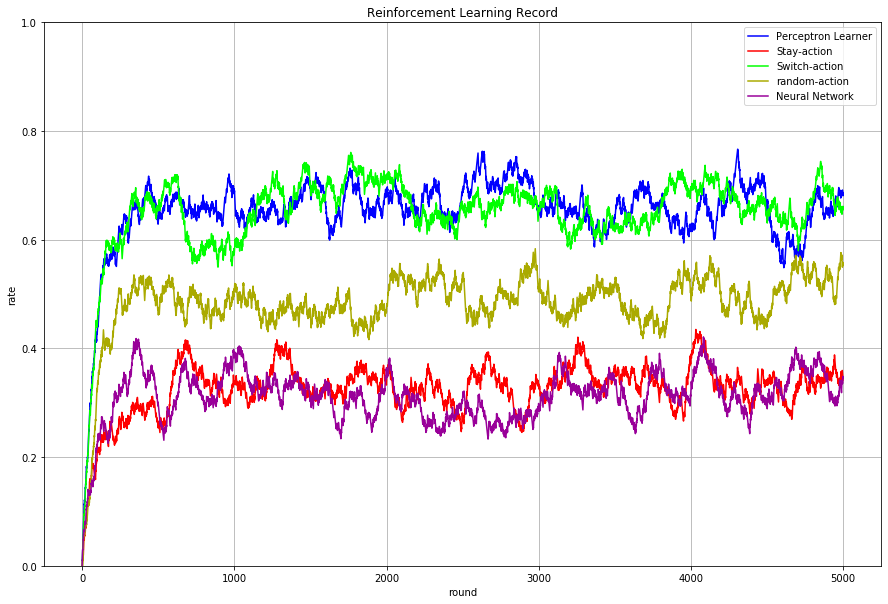

Perceptron intercept: [-1.10000001e-05]
Perceptron input weights: [[ 2.       -0.999994 -1.000021 -2.99999   1.999974  1.000049  2.999715]]
Perceptron intercept: [0 1]


In [15]:
latestSuccess = {"AI": 0, "SWITCH": 0, "STAY": 0, "RAND": 0, "NN": 0}
successTracking = {"AI": [], "SWITCH": [], "STAY": [], "RAND": [], "NN": []}

D=3
TRIALS=5000
WINDOW_FRAC=TRIALS/100

# Input Schema: Q(State, action) 
# - First D slots designate the door player initially selected (so only one of the first three slots should be non-zero)
# - Next D slots designate the doors remaining after a reveal (so only two of the last 3 slots should be non-zero)
# - Last slot is the action (0 = stay, 1 = switch)
# for y value, 1 = win, 0 = loss

# We will first setup our perceptron with a 2-record initial 'training', and bias it against the recommended strategy (just for fun!)
firstDoorChoice = [0 for _ in range(D)]
finalOptionDoors = [0 for _ in range(D)]
firstDoorChoice[0] = 1  # Say we chose the first door
finalOptionDoors[0] = 1 # so first door is unopened at phase 2
finalOptionDoors[1] = 1 # and let's make the second door also still closed/available
action = STAY_STRATEGY  # Let's say we stayed with our original door
result = 1              # and let's say we won

QSA1 = firstDoorChoice + finalOptionDoors + [STAY_STRATEGY]
QSA2 = firstDoorChoice + finalOptionDoors + [SWITCH_STRATEGY]
#print("Q(S,a) := %s" % QSA)
AIPlayer.train([QSA1, QSA2], [1,0])  # Say we won by staying and lost by switching... just for fun 
NNPlayer.train([QSA1, QSA2], [1,0])  # Say we won by staying and lost by switching... just for fun 

# Now we can let our agent play the game a LOT of times and see how it improves over time...
#for i in tqdm(range(5000),unit="games",desc="Monte Hall RLAgent"):
for i in tqdm(range(TRIALS), unit="iter"):
    #Play the game one round with our AI Agent
    result, firstDoorChoice, finalOptionDoors, action = monteHallGame(AIPlayer, D) 
    AIPlayer.update(firstDoorChoice + finalOptionDoors + [action], result) 
    latestSuccess["AI"] = latestSuccess["AI"] * (1 - 1/(TRIALS/WINDOW_FRAC)) + result / (TRIALS/WINDOW_FRAC)
    successTracking["AI"].append(latestSuccess["AI"])
    
    # And a more complex multi-layer perceptron - i.e., and Neural Network
    result, firstDoorChoice, finalOptionDoors, action = monteHallGame(NNPlayer, D) 
    AIPlayer.update(firstDoorChoice + finalOptionDoors + [action], result) 
    latestSuccess["NN"] = latestSuccess["NN"] * (1 - 1/(TRIALS/WINDOW_FRAC)) + result / (TRIALS/WINDOW_FRAC)
    successTracking["NN"].append(latestSuccess["NN"])
    
    # And let the stay-player play too
    result, _, _, _ = monteHallGame(stayPlayer, D) 
    latestSuccess["STAY"] = latestSuccess["STAY"] * (1 - 1/(TRIALS/WINDOW_FRAC)) + result / (TRIALS/WINDOW_FRAC)
    successTracking["STAY"].append(latestSuccess["STAY"])
    # And the smart switcher
    result, _, _, _ = monteHallGame(switchPlayer, D) 
    latestSuccess["SWITCH"] = latestSuccess["SWITCH"] * (1 - 1/(TRIALS/WINDOW_FRAC)) + result / (TRIALS/WINDOW_FRAC)
    successTracking["SWITCH"].append(latestSuccess["SWITCH"])
    # And the "its 50/50", random picker
    result, _, _, _ = monteHallGame(indecisivePlayer, D) 
    latestSuccess["RAND"] = latestSuccess["RAND"] * (1 - 1/(TRIALS/WINDOW_FRAC)) + result / (TRIALS/WINDOW_FRAC)
    successTracking["RAND"].append(latestSuccess["RAND"])
    
# Let's graphically look at the values over time as it 'learned' 
idx = [ i for i in range(len(successTracking["AI"]))]
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
#ax.plot(idx, thresholdTrace, color='0.5', label='threshold for decision')
ax.plot(idx, successTracking["AI"], color='#0000FF', label='Perceptron Learner')
ax.plot(idx, successTracking["STAY"], color='#FF0000', label='Stay-action')
ax.plot(idx, successTracking["SWITCH"], color='#00FF00', label='Switch-action')
ax.plot(idx, successTracking["RAND"], color='#AAAA00', label='random-action')
ax.plot(idx, successTracking["NN"], color='#990099', label='Neural Network')

plt.xlabel("round")
plt.ylabel("rate")
plt.title("Reinforcement Learning Record")
plt.legend()
plt.grid(True, which='both')
plt.ylim(0,1)
plt.gcf().set_size_inches(15,10)
plt.show()

print("Perceptron intercept: %s" % AIPlayer.learner.intercept_)
print("Perceptron input weights: %s" % AIPlayer.learner.coef_)
print("Perceptron intercept: %s" % AIPlayer.learner.classes_)



Crazy, right? Shouldn't a more sophisticated Neural Network do at least as good as a Perceptron? What is going on? Adjust the door count (D), iteration count(TRIALS), and the number of layers in the Neural Network (line 39 with the 'hidden_layer_sizes' parameter) and see how it behaves. This brings up three **very important** rules of thumb when working with machine learning:

1. **Always** run your metrics and have target Measures of Performance (MoP)
1. **Always** have a baseline for comparison (even if it is a "random chooser" or null-hypothesis)
1. **Always** keep [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in mind and don't over complicate your model space

A correllary to the second point is that if your classifier (for a two class problem) is correct less than 50% of the time, reverse its output.

Another way to state point three is K.I.S.S. (Keep it simple _____). A more robust and rigorous treatment of this principle and how to analyze it can be found in [VC-Dimensional analysis](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension) and [PAC Learning](https://en.wikipedia.org/wiki/Probably_approximately_correct_learning) (which is perhaps my favorite term in all of ML material)